In [ ]:
import numpy as np
import pandas as pd 

In [ ]:
dataFrame=pd.read_csv("/content/twitter_training.csv",names=["id","company","kind","tweet"])
dataFrame.head()

,id,company,kind,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
del dataFrame["id"] # Deleting ID column as it has no use in sentiment analysis

In [ ]:
dataFrame.isnull().sum() #Finding the null entries in each column

company      0
kind         0
tweet      686
dtype: int64

In [ ]:
dataFrame=dataFrame.dropna()

In [ ]:
dataFrame.isnull().sum() #All the null values are removed

company    0
kind       0
tweet      0
dtype: int64

Counting the sentiment of each kind in the dataFrame

In [ ]:
dataFrame_count = pd.DataFrame(dataFrame['kind'].value_counts()).reset_index()
dataFrame_count.columns = ['kind', 'Count'] 
dataFrame_count

,kind,Count
0,Negative,22358
1,Positive,20655
2,Neutral,18108
3,Irrelevant,12875


Removing Punctuation in Tweet column by creating a new column named new_Tweet

In [ ]:
dataFrame['new_Tweet']=dataFrame['tweet'].str.replace('[^a-zA-Z0-9]',' ')
dataFrame.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,company,kind,tweet,new_Tweet
0,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


Removing short words like "of", "in" , "on" from the tweets as they are not helpful in sentiment analysis.

In [ ]:
dataFrame['new_Tweet'] = dataFrame['new_Tweet'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))
dataFrame.head() 

# In this code we have removed all 2 letter words from tweets and replaced them with a space whereever needed.

,company,kind,tweet,new_Tweet
0,Borderlands,Positive,im getting on borderlands and i will murder yo...,getting borderlands and will murder you all
1,Borderlands,Positive,I am coming to the borders and I will kill you...,coming the borders and will kill you all
2,Borderlands,Positive,im getting on borderlands and i will kill you ...,getting borderlands and will kill you all
3,Borderlands,Positive,im coming on borderlands and i will murder you...,coming borderlands and will murder you all
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,getting borderlands and will murder you all


In [ ]:
dataFrame['new_Tweet']=dataFrame['new_Tweet'].str.lower()

In [ ]:
dataFrame.head()

,company,kind,tweet,new_Tweet
0,Borderlands,Positive,im getting on borderlands and i will murder yo...,getting borderlands and will murder you all
1,Borderlands,Positive,I am coming to the borders and I will kill you...,coming the borders and will kill you all
2,Borderlands,Positive,im getting on borderlands and i will kill you ...,getting borderlands and will kill you all
3,Borderlands,Positive,im coming on borderlands and i will murder you...,coming borderlands and will murder you all
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,getting borderlands and will murder you all


In the next few cells we will be removing stop words from the tweets

In [ ]:
import nltk                                 #importing libraries for stop word removal
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The below function takes a paragraph, breaks it into words, checks if the word is a stop word, removes if it is a stop word and combine the remaining words into a sentence again.

In [ ]:
def remove_stopwords(twt):
    
    twt_tokenized = word_tokenize(twt)
    twt_new = " ".join([i for i in twt_tokenized  if i not in stop_words])
    return twt_new

In [ ]:
dataFrame['new_Tweet'] = [remove_stopwords(t) for t in dataFrame['new_Tweet']]

In [ ]:
dataFrame.head()

,company,kind,tweet,new_Tweet
0,Borderlands,Positive,im getting on borderlands and i will murder yo...,getting borderlands murder
1,Borderlands,Positive,I am coming to the borders and I will kill you...,coming borders kill
2,Borderlands,Positive,im getting on borderlands and i will kill you ...,getting borderlands kill
3,Borderlands,Positive,im coming on borderlands and i will murder you...,coming borderlands murder
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,getting borderlands murder


Lemmatinzation of the tweets:

In lemmatinzation we convert each word in the tweet to its base root word as many words used provide same meaning but in different verbal form. To avoid this we do lemmatization.

In [ ]:
nltk.download('wordnet')      #Libraries required for lemmatization
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()


In [ ]:
def nltk_tag_to_wordnet_tag(nltk_tag):    #Function that finds the parts of speech tag
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

In [ ]:
def lemmatize_sentence(sentence):     #Function for lemmatization
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenizes the sentence and finds the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
          lemmatized_sentence.append(word)
        else:        
            #uses the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


dataFrame['new_Tweet'] = dataFrame['new_Tweet'].apply(lambda x: lemmatize_sentence(x))

In [ ]:
dataFrame.head()   #Data Frame after Lemmatization

,company,kind,tweet,new_Tweet
0,Borderlands,Positive,im getting on borderlands and i will murder yo...,get borderland murder
1,Borderlands,Positive,I am coming to the borders and I will kill you...,come border kill
2,Borderlands,Positive,im getting on borderlands and i will kill you ...,get borderland kill
3,Borderlands,Positive,im coming on borderlands and i will murder you...,come borderland murder
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,get borderland murder


Plotting top 20 words in positive kind of sentences frequency

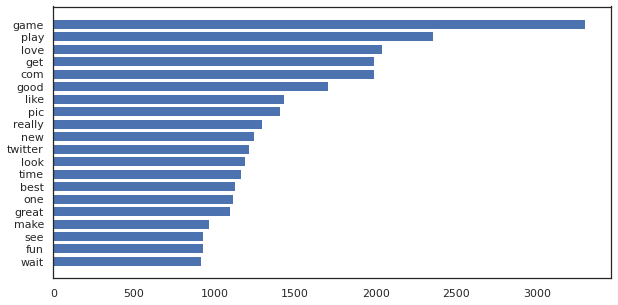

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
pos_Words = dataFrame.loc[dataFrame['kind'] == 'Positive',:]

#Extracts words into list and count frequency
pos_Words_1 = ' '.join([text for text in pos_Words['new_Tweet']])
pos_Words_1 = pos_Words_1.split()
words_df = FreqDist(pos_Words_1)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 20 words by frequency
words_df = words_df.nlargest(columns="count", n = 20) 

words_df.sort_values('count', inplace = True)

# Plotting 20 frequent positive words
plt.figure(figsize=(10,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

Plotting top 20 words in negative kind of sentences frequency

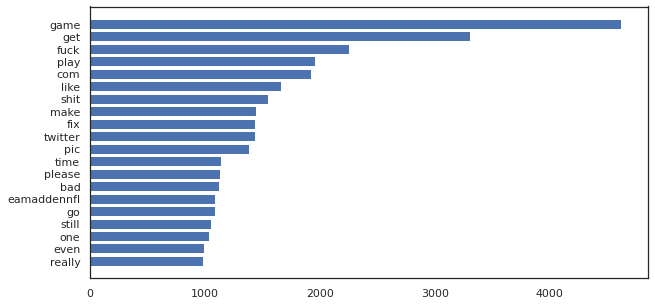

In [ ]:
# Subset negative review dataset
neg_Words = dataFrame.loc[dataFrame['kind'] == 'Negative',:]

#Extracts words into list and count frequency
neg_Words_1 = ' '.join([text for text in neg_Words['new_Tweet']])
neg_Words_1 = neg_Words_1.split()
words_df = FreqDist(neg_Words_1)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 20 words by frequency
words_df = words_df.nlargest(columns="count", n = 20) 

words_df.sort_values('count', inplace = True)

# Plotting 20 frequent negative words
plt.figure(figsize=(10,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

Plotting top 20 words in neutral kind of sentences frequency

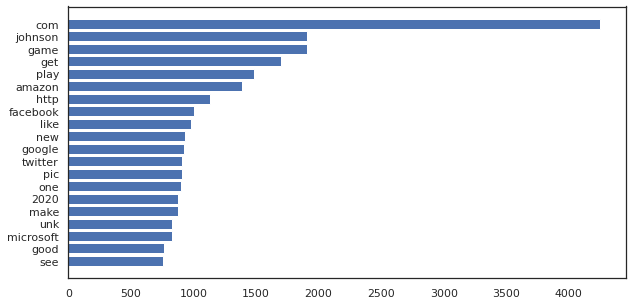

In [ ]:
# Subset Neutral review dataset
neu_Words = dataFrame.loc[dataFrame['kind'] == 'Neutral',:]

#Extracts words into list and count frequency
neu_Words_1 = ' '.join([text for text in neu_Words['new_Tweet']])
neu_Words_1 = neu_Words_1.split()
words_df = FreqDist(neu_Words_1)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 20 words by frequency
words_df = words_df.nlargest(columns="count", n = 20) 

words_df.sort_values('count', inplace = True)

# Plotting 20 frequent neutral words
plt.figure(figsize=(10,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

Plotting top 20 words in Irrelevant kind of sentences frequency

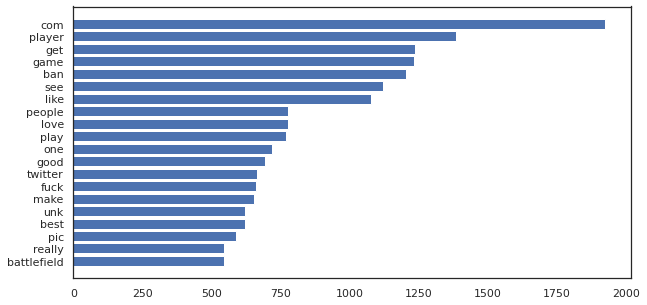

In [ ]:
# Subset Irrelavent review dataset
irr_Words = dataFrame.loc[dataFrame['kind'] == 'Irrelevant',:]

#Extracts words into list and count frequency
irr_Words_1 = ' '.join([text for text in irr_Words['new_Tweet']])
irr_Words_1 = irr_Words_1.split()
words_df = FreqDist(irr_Words_1)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 20 words by frequency
words_df = words_df.nlargest(columns="count", n = 20) 

words_df.sort_values('count', inplace = True)

# Plotting 20 frequent negative words
plt.figure(figsize=(10,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

In TF-IDF, we calculate the TF-IDF score of each word in accordance with the dataset. After that we store the vlaues into a vector.

In [ ]:
#Applying TF-IDF vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2500)

Encoding:

In this step we are mapping positive to 1, negative to 0, neutral to 2 and irrelevant to 3.

In [ ]:
dataFrame['kind']=dataFrame['kind'].map({'Positive':1, 'Neutral':2, 'Negative':0, 'Irrelevant':3})

Decision Tree 

In [ ]:
X = tfidf.fit_transform(dataFrame['new_Tweet']).toarray()
y = dataFrame['kind'].values
featureNames = tfidf.get_feature_names()

# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Fitting model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, dt.predict_proba(X_test),multi_class="ovo")

0.9562499999999999

In [ ]:
X = tfidf.fit_transform(dataFrame['new_Tweet']).toarray()
y = dataFrame["kind"].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto")
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
predictions = rf_model.predict(X_test)
predictions


array([1, 2, 1, ..., 2, 2, 0])

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, rf_model.predict_proba(X_test),multi_class="ovo")

0.9712428513886021

In [ ]:
featureImportance = pd.DataFrame({i : j for i,j in zip(rf_model.feature_importances_,featureNames)}.items(),columns = ['Importance','word'])
featureImportance.sort_values(by='Importance',ascending=False)

,Importance,word
457,1.153347e-02,com
1321,9.603583e-03,love
931,7.012652e-03,fuck
944,6.526015e-03,game
719,6.492820e-03,eamaddennfl
...,...,...
1536,9.457493e-06,origins
1216,6.396480e-06,kamuy
39,5.572827e-06,40gb
134,3.759708e-06,anna


INCREMENT-2

In [ ]:
df=dataFrame['company'].unique()
df

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [ ]:
dataFrame.dtypes

company      object
kind          int64
tweet        object
new_Tweet    object
dtype: object

In [ ]:
df1=dataFrame[dataFrame['kind']==0]
df2=dataFrame[dataFrame['kind']==1]


In [ ]:
dataFrame_count = pd.DataFrame(dataFrame['kind'].value_counts()).reset_index()
dataFrame_count.columns = ['kind', 'Count'] 
dataFrame_count

,kind,Count
0,0,22358
1,1,20655
2,2,18108
3,3,12875


In [ ]:
df1_count = pd.DataFrame(df1['company'].value_counts()).reset_index() #Count of Positive tweets on a game or company
df1_count.columns = ['company', 'Count']
df1_count

,company,Count
0,MaddenNFL,1694
1,NBA2K,1469
2,FIFA,1169
3,TomClancysRainbowSix,1115
4,Verizon,1092
5,TomClancysGhostRecon,894
6,HomeDepot,892
7,CallOfDuty,883
8,johnson&johnson,845
9,Dota2,767


In [ ]:
df2_count = pd.DataFrame(df2['company'].value_counts()).reset_index() #count of negative tweets on a Game or company
df2_count.columns = ['company', 'Count'] 
df2_count

,company,Count
0,AssassinsCreed,1439
1,Borderlands,1017
2,Cyberpunk2077,950
3,PlayStation5(PS5),936
4,RedDeadRedemption(RDR),927
5,CallOfDutyBlackopsColdWar,856
6,Hearthstone,833
7,Nvidia,802
8,Xbox(Xseries),785
9,HomeDepot,772


In [ ]:
dataFrame1=pd.read_csv("/content/nlp_myfile.csv",names=["Game_or_Org","Organization","Published Year","Stoke price before","Stock price after","Positive tweets","Negative tweet","Positivity percent"])
dataFrame1.head()

,Game_or_Org,Organization,Published Year,Stoke price before,Stock price after,Positive tweets,Negative tweet,Positivity percent
0,Borderlands',TAKE-TWO INTERACTIVE SOFTWARE,2009,10.55,9.01,426,1017,29.52
1,CallOfDutyBlackopsColdWar',Activision Blizzard,2020,61.00,89.48,566,856,39.80
2,'Amazon',Amazon,2016,32.81,38.17,575,308,65.12
3,Overwatch',Activision Blizzard,2016,38.06,36.77,627,726,46.34
4,'Xbox(Xseries)',Xbox Game Studios,2015,47.00,55.35,373,785,32.21


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


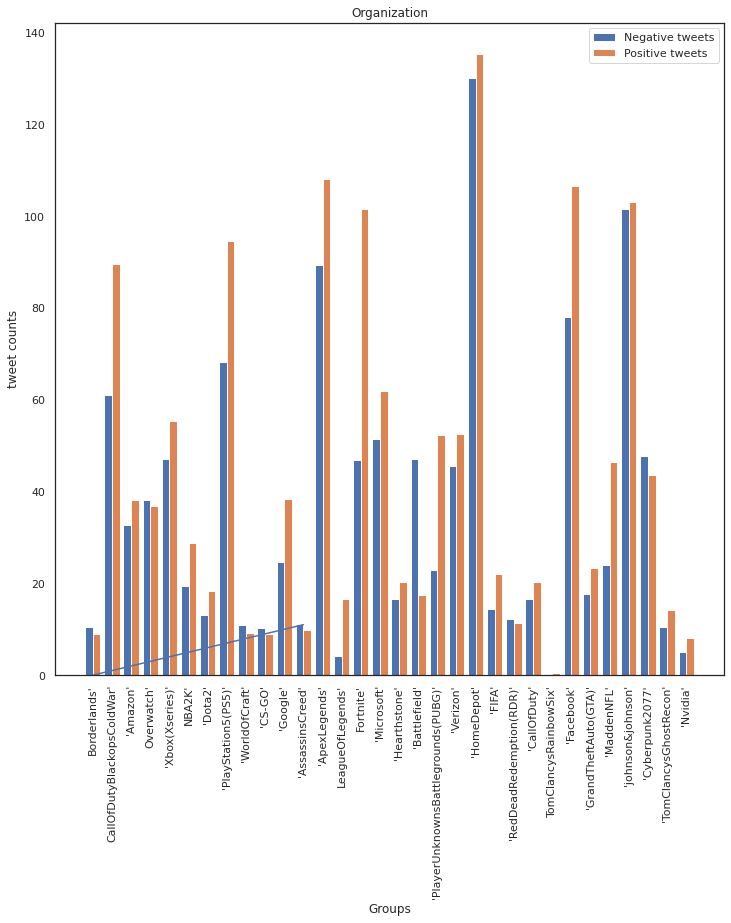

In [ ]:
X = dataFrame1['Game_or_Org']
Y = dataFrame1['Stoke price before']
Z = dataFrame1['Stock price after']

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4, label = 'Negative tweets')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'Positive tweets')
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.xticks(rotation=90)
plt.ylabel("tweet counts")
plt.title("Organization")
plt.legend()
plt.rcParams['figure.figsize'] = (12, 12)

plt.plot(range(12), range(12))
plt.savefig('nlpimage.png')
  
plt.show()

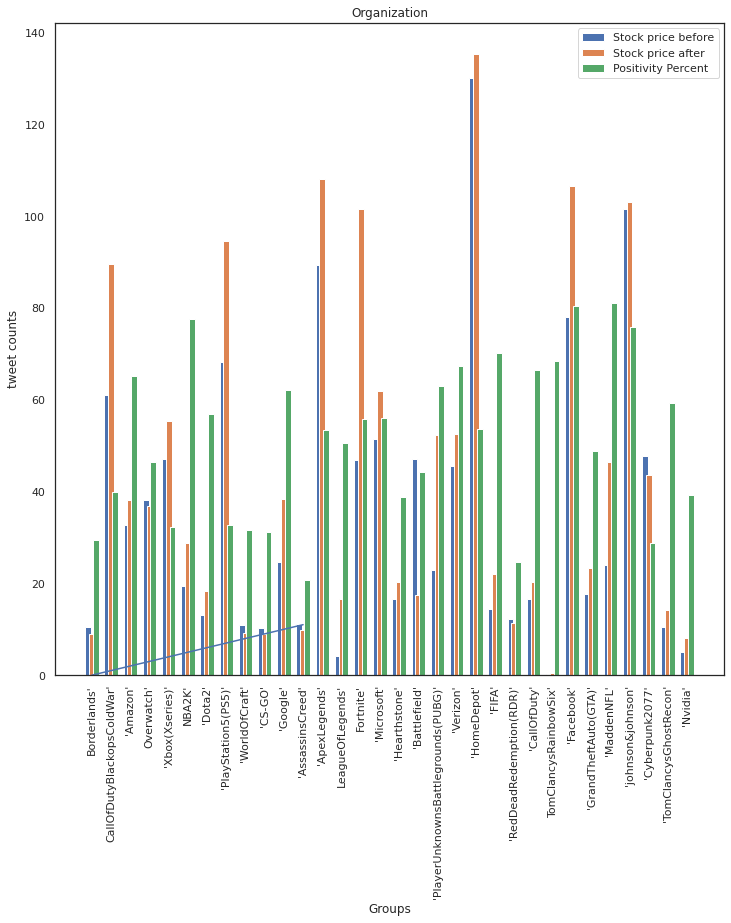

In [ ]:
X = dataFrame1['Game_or_Org']
Y = dataFrame1['Stoke price before']
Z = dataFrame1['Stock price after']
A = dataFrame1['Positivity percent']

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.3, label = 'Stock price before')
plt.bar(X_axis -0, Z, 0.3, label = 'Stock price after')
plt.bar(X_axis + 0.2, A, 0.3, label = 'Positivity Percent')
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.xticks(rotation=90)
plt.ylabel("tweet counts")
plt.title("Organization")
plt.legend()
plt.rcParams['figure.figsize'] = (12, 12)

plt.plot(range(12), range(12))
plt.savefig('nlpimage1.png')
  
plt.show()

In [ ]:
dataFrame1['Organization'] = dataFrame1['Organization'].astype('str')
dataFrame1.dtypes

Game_or_Org            object
Organization           object
Published Year          int64
Stoke price before    float64
Stock price after     float64
Positive tweets         int64
Negative tweet          int64
Positivity percent    float64
dtype: object

In [ ]:
dataFrame2=pd.read_csv("/content/NLP_file2.csv",names=["Game_or_Org","Organization","Published Year","Stoke price before","Stock price after","Positive tweets","Negative tweet","Positivity percent"])
dataFrame2.head()

,Game_or_Org,Organization,Published Year,Stoke price before,Stock price after,Positive tweets,Negative tweet,Positivity percent
0,'ApexLegends',Electronic Arts,2019,89.45,108.11,691,604,53.36
1,'Battlefield',Electronic Arts,2008,47.01,17.55,464,586,44.19
2,'FIFA',Electronic Arts,2013,14.46,22.02,1169,495,70.25
3,'MaddenNFL',Electronic Arts,2014,23.98,46.44,1694,396,81.05


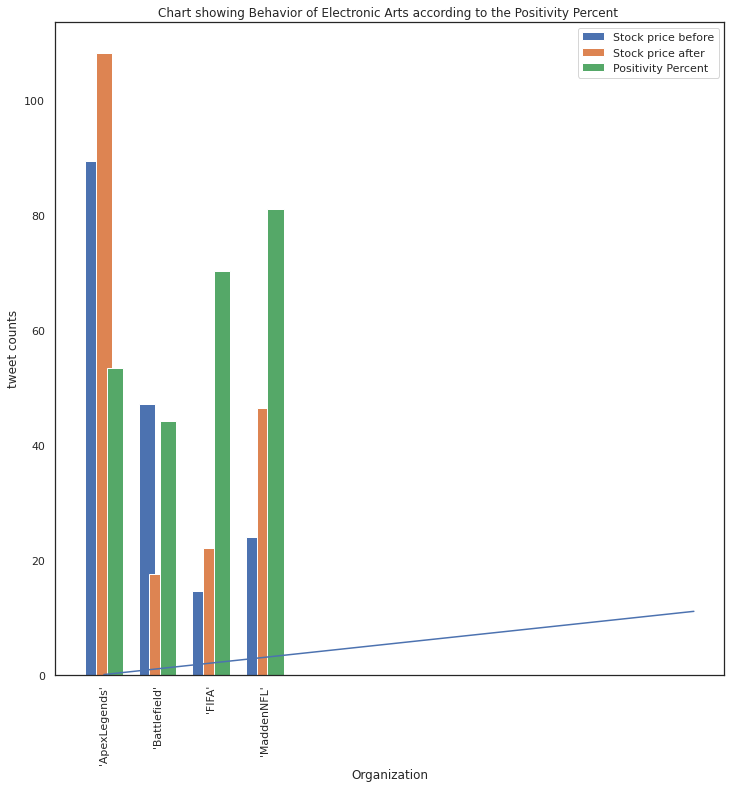

In [ ]:
X = dataFrame2['Game_or_Org']
Y = dataFrame2['Stoke price before']
Z = dataFrame2['Stock price after']
A = dataFrame2['Positivity percent']

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.3, label = 'Stock price before')
plt.bar(X_axis -0, Z, 0.3, label = 'Stock price after')
plt.bar(X_axis + 0.2, A, 0.3, label = 'Positivity Percent')
  
plt.xticks(X_axis, X)
plt.xlabel("Organization")
plt.xticks(rotation=90)
plt.ylabel("tweet counts")
plt.title("Chart showing Behavior of Electronic Arts according to the Positivity Percent ")
plt.legend()
plt.rcParams['figure.figsize'] = (12, 12)

plt.plot(range(12), range(12))

  
plt.show()

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

In [ ]:
start = "2008-01-01"
end = '2020-01-01'
EA = yf.download('EA',start,end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
s1="2018-12-04" #2 months before launch date of apex legends
e1="2019-04-04" #2 months after launch data of apex legends 
EA_apex = yf.download('EA',s1,e1)

s2="2008-05-23" #2 months before launch date of Battle field
e2="2008-07-23" #2 months after launch data of Battle field
EA_batfield = yf.download('EA',s2,e2)

s3="2013-06-10" #2 months before launch date of FIFA
e3="2013-11-10" #2 months after launch data of FIFA
EA_fifa = yf.download('EA',s3,e3)

s4="2014-07-26" #2 months before launch date of MaddenNFL
e4="2014-11-26" #2 months after launch data of MaddenNFL
EA_maddenNFL = yf.download('EA',s4,e4)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


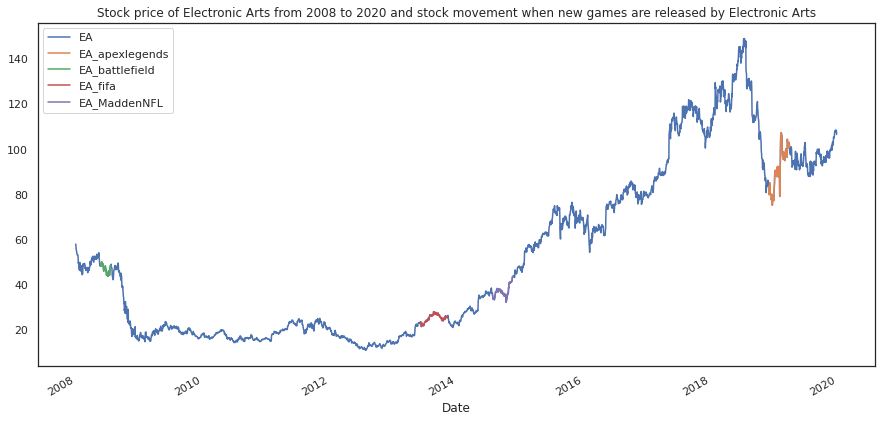

In [ ]:
EA['Open'].plot(label = 'EA', figsize = (15,7))
EA_apex['Open'].plot(label = 'EA_apexlegends')
EA_batfield['Open'].plot(label = 'EA_battlefield')
EA_fifa['Open'].plot(label = 'EA_fifa')
EA_maddenNFL['Open'].plot(label = 'EA_MaddenNFL')
plt.title("Stock price of Electronic Arts from 2008 to 2020 and stock movement when new games are released by Electronic Arts")
plt.legend()

In [ ]:
print(dataFrame2[["Game_or_Org","Positivity percent"]]) # Positivity percent of the games

     Game_or_Org  Positivity percent
0  'ApexLegends'               53.36
1  'Battlefield'               44.19
2         'FIFA'               70.25
3    'MaddenNFL'               81.05


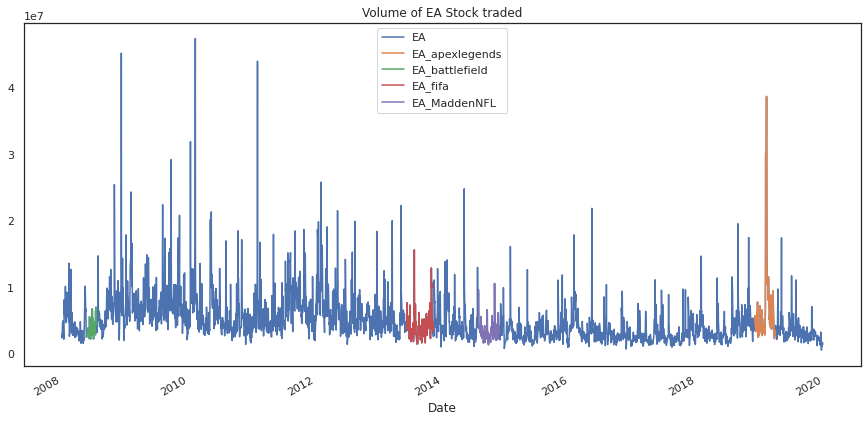

In [ ]:
EA['Volume'].plot(label = 'EA', figsize = (15,7))
EA_apex['Volume'].plot(label = "EA_apexlegends")
EA_batfield['Volume'].plot(label = 'EA_battlefield')
EA_fifa['Volume'].plot(label = 'EA_fifa')
EA_maddenNFL['Volume'].plot(label = 'EA_MaddenNFL')
plt.title('Volume of EA Stock traded')
plt.legend()

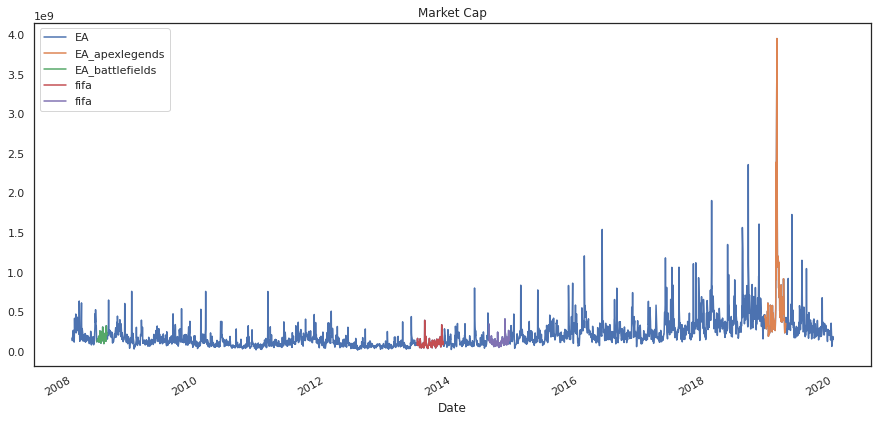

In [ ]:
#Market Capitalisation
EA['MarktCap'] = EA['Open'] * EA['Volume']
EA_apex['MarktCap'] = EA_apex['Open'] * EA_apex['Volume']
EA_batfield['MarktCap'] = EA_batfield['Open'] * EA_batfield['Volume']
EA_fifa['MarktCap'] = EA_fifa['Open'] * EA_fifa['Volume']
EA_maddenNFL['MarktCap'] = EA_maddenNFL['Open'] * EA_maddenNFL['Volume']
EA['MarktCap'].plot(label = 'EA', figsize = (15,7))
EA_apex['MarktCap'].plot(label ='EA_apexlegends')
EA_batfield['MarktCap'].plot(label = 'EA_battlefields')
EA_fifa['MarktCap'].plot(label='fifa')
EA_maddenNFL['MarktCap'] = EA_maddenNFL['Open'] * EA_maddenNFL['Volume']
EA_maddenNFL['MarktCap'].plot(label='fifa')
plt.title('Market Cap')
plt.legend()